# Confusion Matrix 

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.20, random_state = 111)

In [4]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

test_predict_proba = lr.predict_proba(X_test)[:, 1]

In [5]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_test = confusion_matrix(y_test, test_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[154  14]
 [ 10 277]]
[[40  4]
 [ 2 68]]


# Accuracy

In [6]:
from sklearn.metrics import accuracy_score

In [8]:
print (lr.score(X_test, y_test))
print (accuracy_score(y_test, test_pred))

0.9473684210526315
0.9473684210526315


# Error Rate 
# Precision (missclasification rate)

In [10]:
from sklearn.metrics import precision_score

print(precision_score(y_test, test_pred))

0.9444444444444444


# Recall 


In [11]:
from sklearn.metrics import recall_score
print(recall_score(y_test, test_pred))

0.9714285714285714


# ROC Curve

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, test_predict_proba)

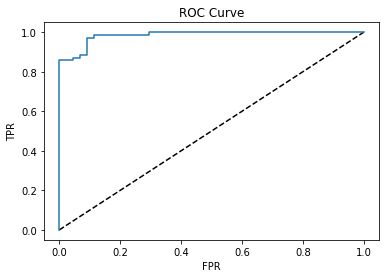

In [16]:
import matplotlib.pyplot as plt
plt.plot ([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")

plt.show()

In [17]:
print(roc_auc_score(y_test, test_predict_proba))

0.9847402597402598


# Saving the model 

In [ ]:
from sklearn.externals import joblib

joblib.dump(lr, "logreg.pkl")




my_model = joblib.load("logreg.pkl")
my_model